# Milestone-3:: Template Code: Application of various classifiers 

### Index:

1. **Pre-processing the Dataset**:
    - Importing Libraries
    - Read Dataset
    - Handling constant, duplicates values
    - Applying clean_dataset function to handle null, NaN, infinite values
    
2. **Exploratory Data Analysis**:
    - Applying SimpleImputer
    - Applying Label Encoder
    - Correlation between attributes
    - Skew of univariate distributions
    - Box plot features
    - Evaluation of missing values
    
2. **Data Modelling & Feature Selection**:
    - Split the data into Test and Train the data
    - Apply SelectKBest to extract the top 10 best features
    - Top 10 Feature Selection and calculate its Importance 

3. **Application of various classifiers**:
    - Model Results
    - Model Execution Time
    - AUC Score and ROC Curve Plot


## 1. Pre-processing the dataset:

In [1]:
#Load Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier
import category_encoders as ce
from xgboost.sklearn import XGBRegressor
from sklearn import preprocessing
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn import utils
#import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import  scatter_matrix
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

from multiprocessing import Pool
import sys
import time


In [2]:
dropped_columns = set()
targetVariable='fraudulent'
    
df=pd.read_csv('fake_job_postings.csv')
    
# number of rows and columns;
rows, columns = df.shape
print(f'Number of rows: {rows}\nNumber of columns: {columns}')

# Display Categorical Columns    
cv=df.dtypes.loc[df.dtypes=='object'].index
categorical = list(df.select_dtypes(include=['object']).columns.values)
# print (cv)
print(categorical)

df.drop("job_id", axis=1, inplace=True)

Number of rows: 17880
Number of columns: 18
['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


## 2. Exploratory Data Analysis:

In [3]:
try:
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    # To calculate mean use imputer class
    from sklearn.impute import SimpleImputer
    
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

    # Train the imputer on the numeric columns of the df dataset and apply it to fill in missing values
    imputed_df = df.copy()
    imputed_df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

    # View the imputed data
    print(imputed_df)
    
except Exception as e:
    print("FillNAs")
    print(str(e))


                                                   title   
0                                       Marketing Intern  \
1              Customer Service - Cloud Video Production   
2                Commissioning Machinery Assistant (CMA)   
3                      Account Executive - Washington DC   
4                                    Bill Review Manager   
...                                                  ...   
17875                   Account Director - Distribution    
17876                                 Payroll Accountant   
17877  Project Cost Control Staff Engineer - Cost Con...   
17878                                   Graphic Designer   
17879                         Web Application Developers   

                   location   department salary_range   
0          US, NY, New York    Marketing          NaN  \
1            NZ, , Auckland      Success          NaN   
2             US, IA, Wever          NaN          NaN   
3        US, DC, Washington        Sales          N

In [4]:
try:
    print(df.shape)
    print(df.info())   
    print(df.groupby(targetVariable).size() )
    print(df.describe())
    
except Exception as e:
    print("Preprocess errors 2")
    print (str(e))

(17880, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15184 non-null  object
 7   benefits             10668 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  obje

In [5]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

try:
    for cat in categorical:
        print(cat)
        df[cat] = le.fit_transform(df[cat].astype(str))
        
except Exception as e:
    print("errorEncoder")
    print (str(e))

title
location
department
salary_range
company_profile
description
requirements
benefits
employment_type
required_experience
required_education
industry
function


In [6]:
def drop_constant_columns(dataframe):
    result = dataframe.copy()
    for column in dataframe.columns:
        if column == 'fraudulent':
            continue
        if len(dataframe[column].unique()) == 1:
            result = result.drop(column, axis=1)
    return result

def drop_low_variance_columns(dataframe):
    try:
        eps = 1e-6
        dropped_columns = set()
        C = dataframe.columns
        print('Identifying low-variance columns...')
        for c in C:
            if c == 'fraudulent':
                continue
            variance = dataframe.loc[:, c].var()
            if variance < eps:
                dropped_columns.add(c)
                dataframe = dataframe.drop(c, axis=1)
        print(f'Dropped {len(dropped_columns)} low-variance columns:', dropped_columns)
        return dataframe
    except Exception as e:
        print("Error dropping low variance columns:", str(e))

# drop columns with low variance
try:
    # exclude target column from low variance check
    X = df.drop('fraudulent', axis=1)
    y = df['fraudulent']
    
    # column variance of the dataframe
    print("Column variance:", X.var(axis=0))
    
    # row variance of the dataframe
    print("Row variance:", X.var(axis=1))
    
    # drop columns with low variance
    X = drop_low_variance_columns(X)
    threshold = 0.2
    X = X.loc[:, X.std() >= threshold]
    
    # add target column back to dataframe
    X['fraudulent'] = y
    
    print("Number of columns after dropping low variance:", X.shape[1])
    
except Exception as e:
    print("Error dropping low variance columns:", str(e))


Column variance: title                  1.050438e+07
location               8.242765e+05
department             1.340149e+05
salary_range           3.280852e+04
company_profile        2.829053e+05
description            1.784153e+07
requirements           1.399946e+07
benefits               3.814661e+06
telecommuting          4.105923e-02
has_company_logo       1.628058e-01
has_questions          2.499455e-01
employment_type        2.808919e+00
required_experience    6.474760e+00
required_education     2.882873e+01
industry               1.862943e+03
function               1.544431e+02
dtype: float64
Row variance: 0        4.969839e+06
1        1.004311e+07
2        5.546809e+06
3        6.080665e+06
4        4.084924e+06
             ...     
17875    8.384866e+06
17876    8.956401e+06
17877    5.622038e+06
17878    3.657944e+06
17879    2.215175e+07
Length: 17880, dtype: float64
Identifying low-variance columns...
Dropped 0 low-variance columns: set()
Number of columns after dropping

In [7]:
missing_data=df.isnull()

# check infinite value
print("check infinite value, you should get false then true")
print("now all false")
print(np.isnan(df.any())) 


check infinite value, you should get false then true
now all false
title                  False
location               False
department             False
salary_range           False
company_profile        False
description            False
requirements           False
benefits               False
telecommuting          False
has_company_logo       False
has_questions          False
employment_type        False
required_experience    False
required_education     False
industry               False
function               False
fraudulent             False
dtype: bool


In [8]:

print("now all true")
print(np.isfinite(df.all())) 
print("end check infinite values")

now all true
title                  True
location               True
department             True
salary_range           True
company_profile        True
description            True
requirements           True
benefits               True
telecommuting          True
has_company_logo       True
has_questions          True
employment_type        True
required_experience    True
required_education     True
industry               True
function               True
fraudulent             True
dtype: bool
end check infinite values


In [9]:

print(missing_data.head(5))
print(missing_data.sum())
print(df.head(5))

   title  location  department  salary_range  company_profile  description   
0  False     False       False         False            False        False  \
1  False     False       False         False            False        False   
2  False     False       False         False            False        False   
3  False     False       False         False            False        False   
4  False     False       False         False            False        False   

   requirements  benefits  telecommuting  has_company_logo  has_questions   
0         False     False          False             False          False  \
1         False     False          False             False          False   
2         False     False          False             False          False   
3         False     False          False             False          False   
4         False     False          False             False          False   

   employment_type  required_experience  required_education  industr

In [10]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from pandas.api.types import CategoricalDtype
from collections import defaultdict
from sklearn.model_selection import train_test_split

# clean the data set from nulls, nan, and infitinity values
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf])
    return df[indices_to_keep].astype(np.float64)

X = df
y = pd.DataFrame(data=X, columns=[targetVariable])

try:
    clean_dataset(df)
except Exception as e:
    print("error_preprocess_clean_dataset")
    print(str(e))

try:
    ce_ord = ce.OrdinalEncoder(cols=['title', 'location', 'department', 'salary_range',
                                      'company_profile', 'description', 'requirements', 'benefits',
                                      'employment_type', 'required_experience', 'required_education',
                                      'industry', 'function'])
    df = ce_ord.fit_transform(df)

    outdata = ce_ord.fit_transform(X, y)
    outdata1 = outdata[['fraudulent', 'description', 'title']]
    outdata2 = outdata[['fraudulent', 'description']]
    outdata3 = outdata[['fraudulent']]

    # we use all columns except PolarityClass as features for training
    label = df[targetVariable]
    label1 = df[targetVariable]
    features = df.drop(targetVariable, axis=1)  # fix here

    # the label is PolarityClass
    print(outdata)

except Exception as e:
    print("error_preprocess0")
    print(str(e))


       title  location  department  salary_range  company_profile   
0          1         1           1             1                1  \
1          2         2           2             1                2   
2          3         3           3             1                3   
3          4         4           4             1                4   
4          5         5           3             1                5   
...      ...       ...         ...           ...              ...   
17875  11230        28           4             1              648   
17876   5411        61          79             1               57   
17877  11231       133           3             1               18   
17878    658      1921           3             1                6   
17879   7598       511          17             1              648   

       description  requirements  benefits  telecommuting  has_company_logo   
0                1             1         1              0                 1  \
1            

Correlation with target variable:
fraudulent             1.000000
location               0.079086
salary_range           0.057828
title                  0.052733
department             0.035257
telecommuting          0.034523
required_education     0.034296
description            0.032437
benefits               0.027222
industry               0.017471
requirements           0.014085
function               0.003221
employment_type        0.002962
required_experience   -0.009326
company_profile       -0.065694
has_questions         -0.091627
has_company_logo      -0.261971
Name: fraudulent, dtype: float64


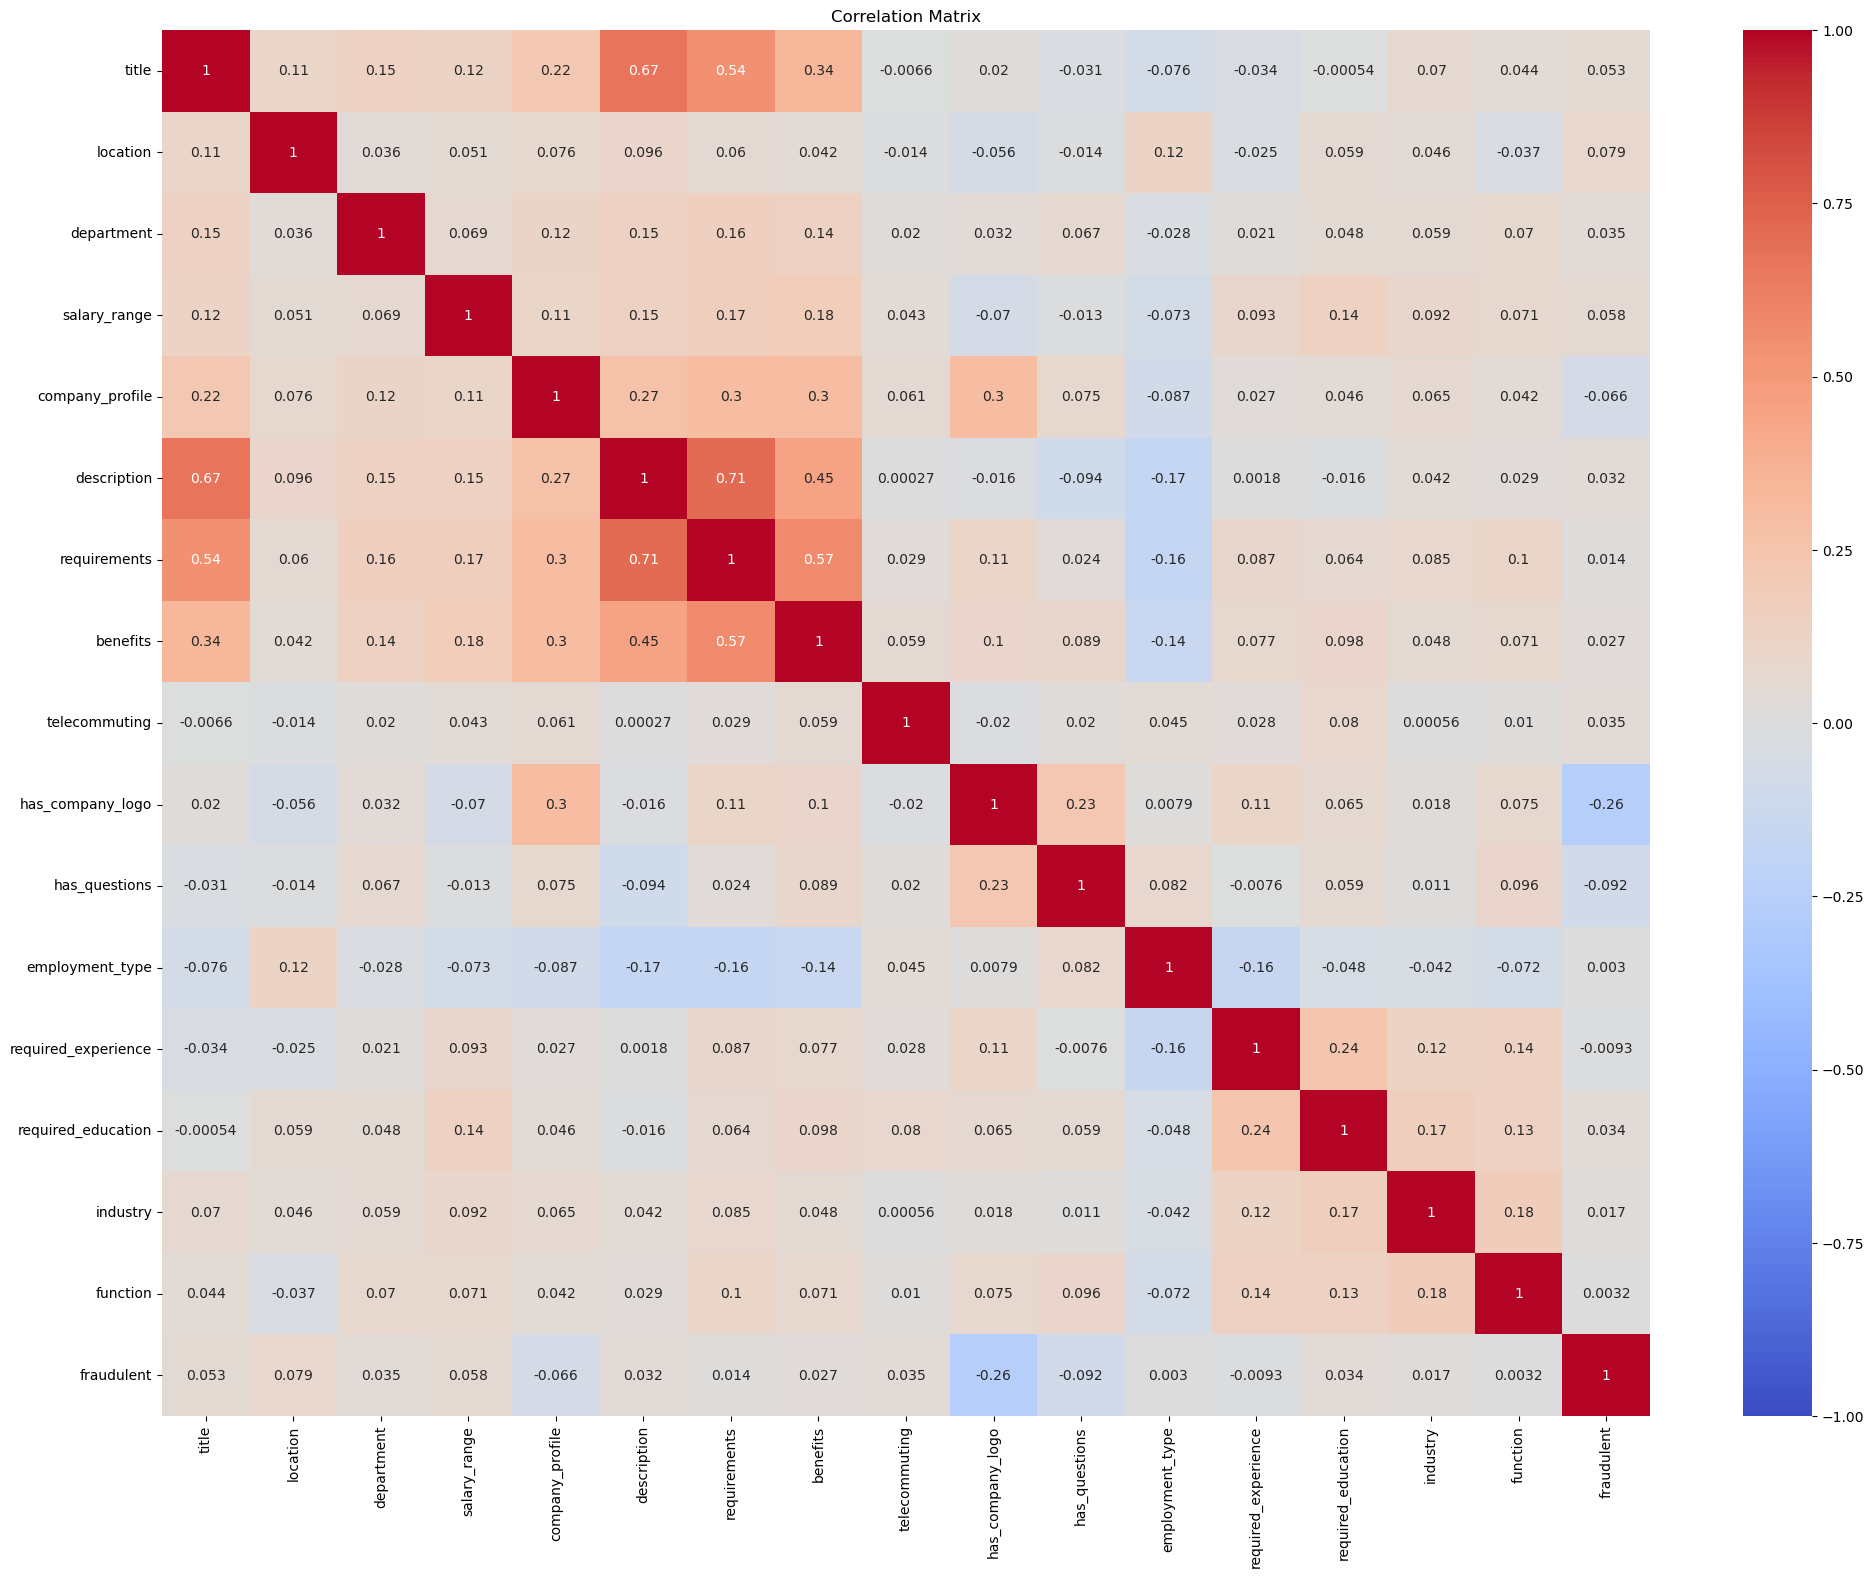

In [11]:
# Correlation Between Attributes

try:
    corr_matrix = df.corr()
    
    # Check correlation with target variable
    target_corr = corr_matrix[targetVariable].sort_values(ascending=False)
    print("Correlation with target variable:")
    print(target_corr)
    
    # Visualize correlation matrix
    plt.figure(figsize=(24, 18))
    sns.heatmap(corr_matrix, vmin=-1, vmax=1.0, cmap="coolwarm", annot=True)
    plt.title("Correlation Matrix")
    plt.savefig('correlation_matrix_plot.png')
    plt.show()
    
except Exception as e:
    print("Error during preprocessing:")
    print(str(e))


title                  0.420581
location               1.534692
department             3.092460
salary_range           4.003857
company_profile        1.445976
description            0.101635
requirements           0.346472
benefits               1.054268
telecommuting          4.512188
has_company_logo      -1.463895
has_questions          0.033117
employment_type        1.634571
required_experience    0.616228
required_education     2.093005
industry               2.053254
function               2.011098
fraudulent             4.207199
dtype: float64


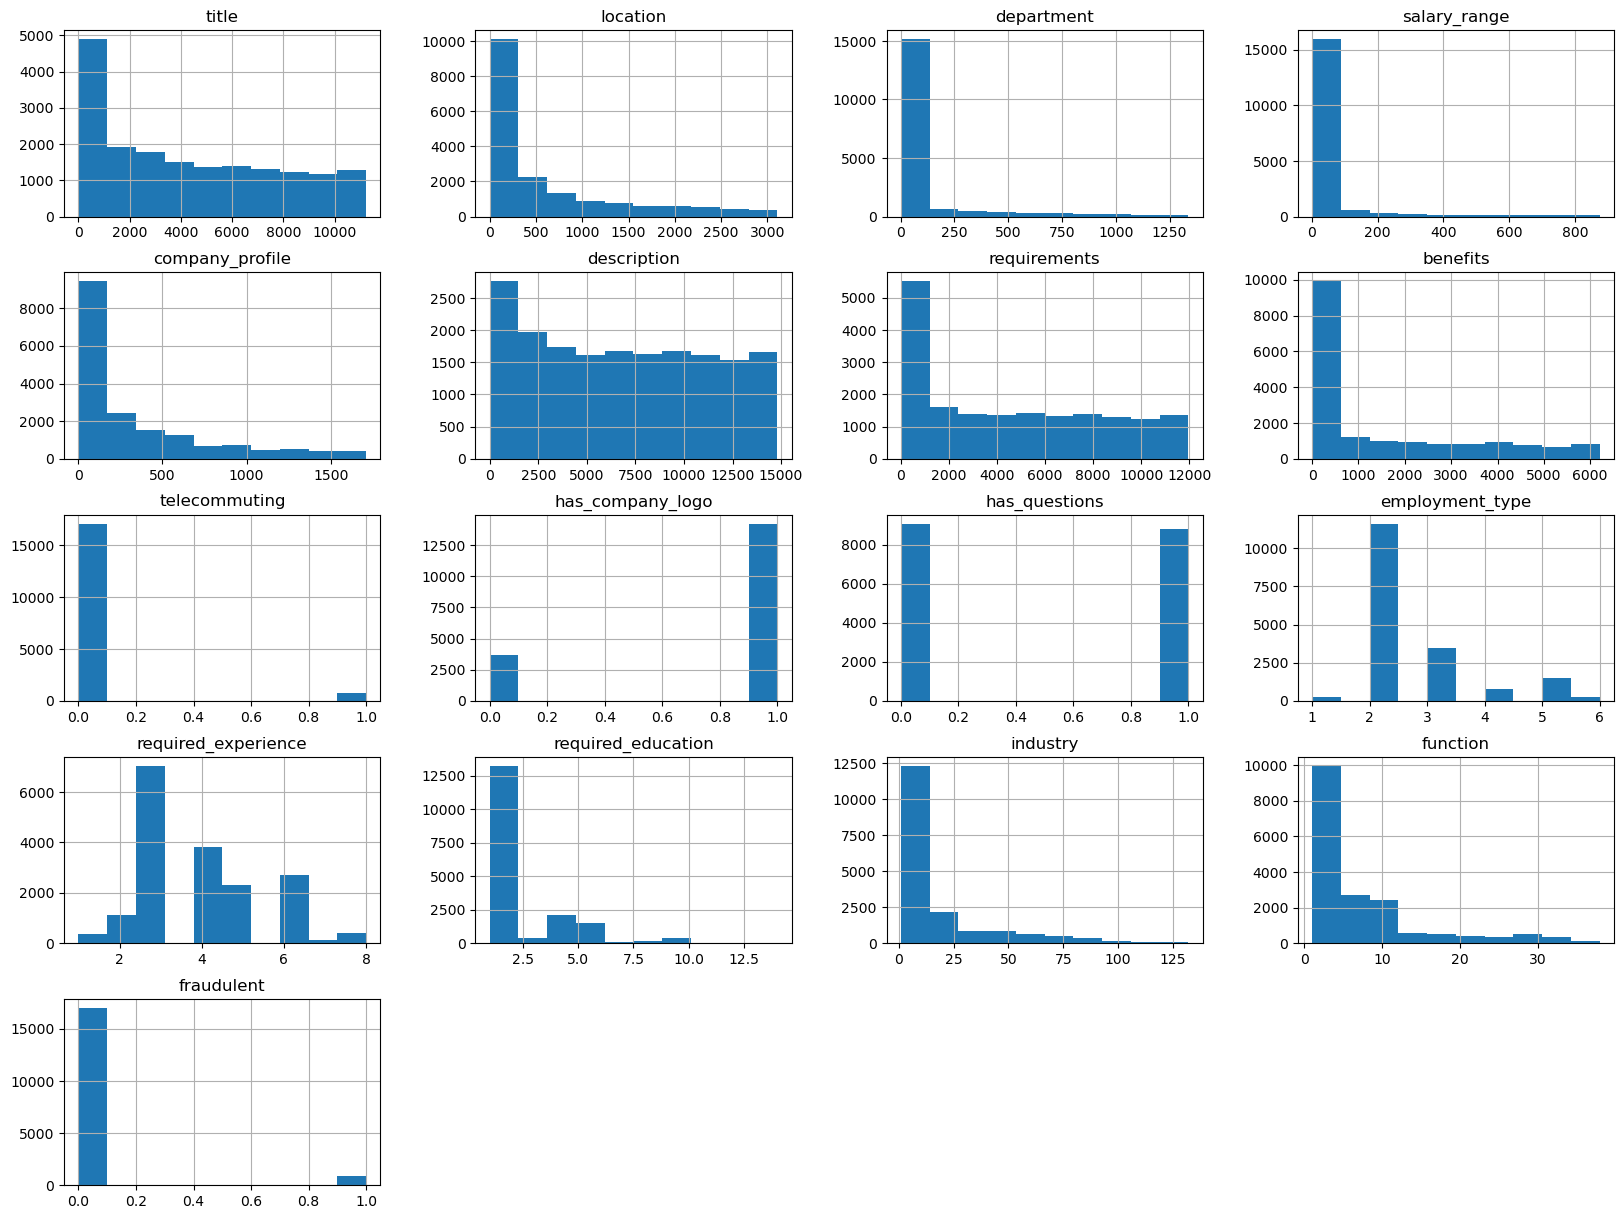

In [12]:
#Skew of Univariate Distributions
#The skew result can show us a positive(right) or negative (left) skew. Values closer to zero show less skew
try:
    print(df.skew())
    #It is better to use some data visualization to get a better idea.
    from matplotlib import pyplot as plt
    df.hist(bins=10, figsize=(20,15))
    plt.savefig('Univariate_Distributions.png')
    plt.show()
    
except Exception as e:
    print("errorUnivariate")
    print (str(e))

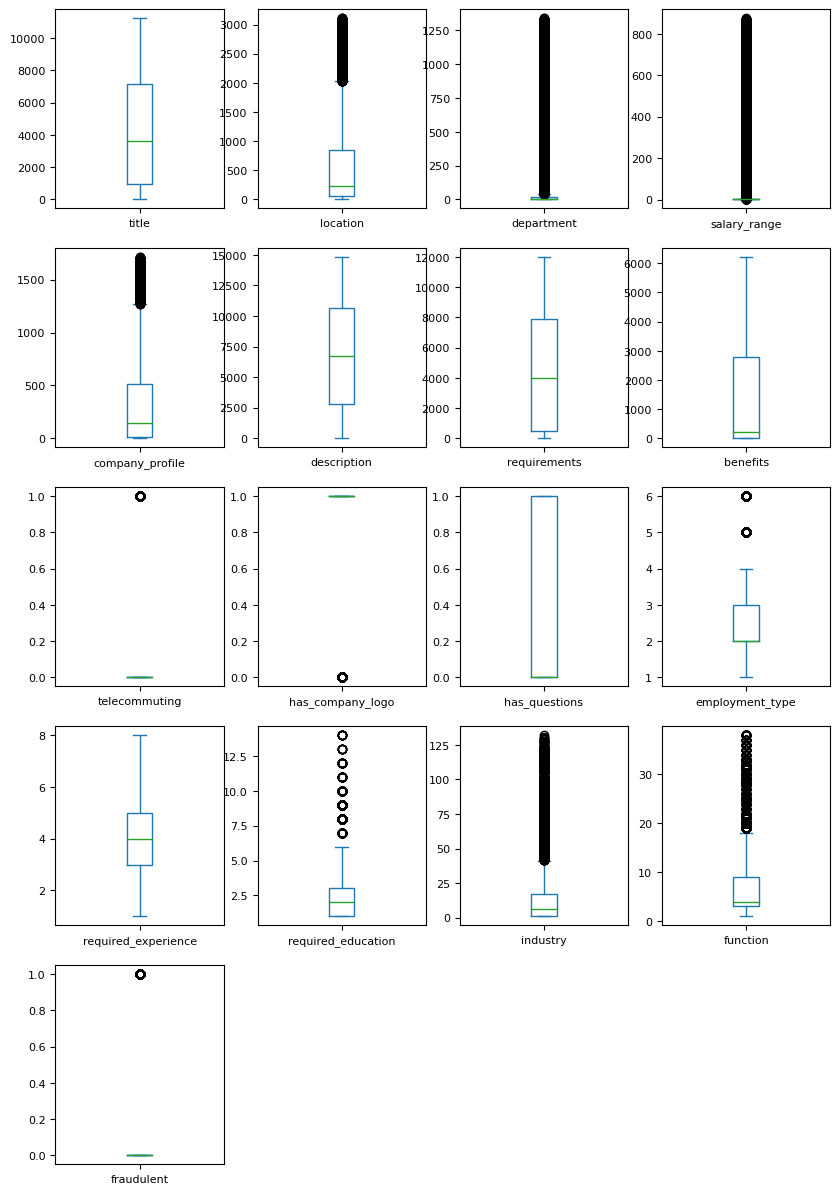

In [13]:
df.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False, fontsize=8, figsize=(10,15))

try:
    plt.savefig('boxplot.png')
    plt.show()
except Exception as e:
    print("errorUnivariate")
    print (str(e))

In [14]:
# Evaluation for Missing Data

try:
    # Check for missing data
    missing_data = df.isnull()
    print("Number of missing values per column:")
    print(missing_data.sum())
    
    # Check distribution of missing values per column
    for column in missing_data.columns.values.tolist():
        print("Column: " + column)
        print(missing_data[column].value_counts())
        print("--------------------------------")
    
    # Calculate percentage of missing data
    percent_missing = round((missing_data.sum() / len(missing_data)) * 100, 4)
    print("Percentage of missing data per column:")
    print(percent_missing)
    
    # Check for outliers
    quantile_threshold = 0.99
    quantile = df.quantile(quantile_threshold)
    print("Outliers (values higher than " + str(quantile_threshold) + " quantile):")
    print(df[df > quantile])
    
    # Check data types
    print("Data types per column:")
    print(df.dtypes)
    
except Exception as e:
    print("Error during missing data evaluation:")
    print(str(e))

Number of missing values per column:
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64
Column: title
title
False    17880
Name: count, dtype: int64
--------------------------------
Column: location
location
False    17880
Name: count, dtype: int64
--------------------------------
Column: department
department
False    17880
Name: count, dtype: int64
--------------------------------
Column: salary_range
salary_range
False    17880
Name: count, dtype: int64
--------------------------------
Column: company_profile
company_profile
False    17880
Name: count, dtype: int64
--------------------------------
Colum

## 3. Data Modelling and Feature Selection

Type of target variable: binary
Encoded target variable: [0 0 0 ... 0 0 0]

Top 10 features selected using SelectKBest with chi2 as a score function:
             Features          Score
0              title  140210.670310
1           location  113677.837500
5        description   55098.088234
4    company_profile   42633.833129
7           benefits   33308.884419
3       salary_range   25818.132917
2         department   13759.119116
6       requirements   11892.280805
9   has_company_logo     251.182084
14          industry     182.335886


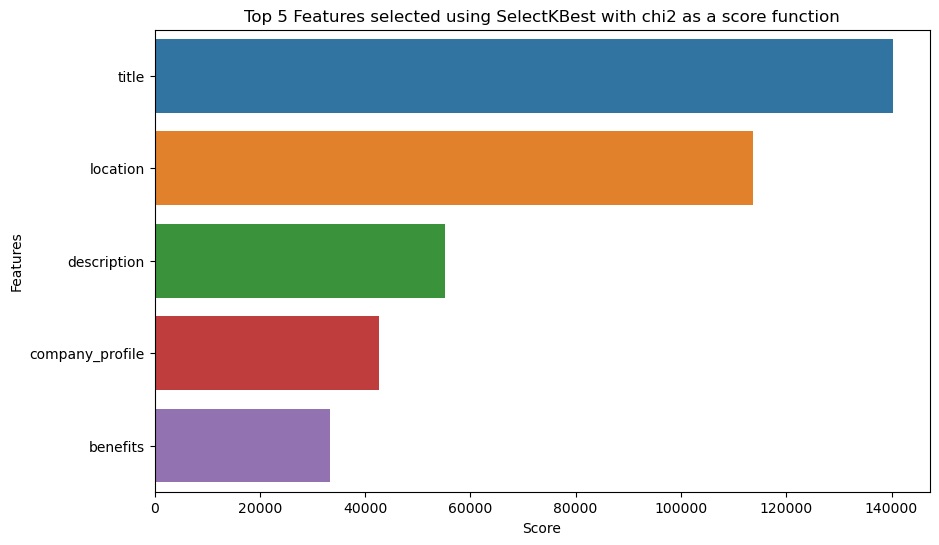

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn import utils

try:
    # Separate the target variable and features
    X = df.drop(targetVariable, axis=1)
    y = df[targetVariable]

    # Encode the target variable
    lab_enc = preprocessing.LabelEncoder()
    training_scores_encoded = lab_enc.fit_transform(y)

    # Print the type of target variable and encoded variable
    print("Type of target variable:", utils.multiclass.type_of_target(y))
    print("Encoded target variable:", training_scores_encoded)

    # 1- Univariate Selection
    # Apply SelectKBest to extract the top 10 best features
    best_features = SelectKBest(score_func=chi2, k='all')
    fit = best_features.fit(X, training_scores_encoded)

    # Create a dataframe with feature scores and columns
    df_scores = pd.DataFrame(fit.scores_)
    df_columns = pd.DataFrame(X.columns)
    feature_scores = pd.concat([df_columns, df_scores], axis=1)
    feature_scores.columns = ['Features', 'Score']

    # Print the top 10 features
    print("\nTop 10 features selected using SelectKBest with chi2 as a score function:\n", feature_scores.nlargest(10, 'Score'))

    # Visualize the top 10 features using a bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Score', y='Features', data=feature_scores.nlargest(5, 'Score'))
    plt.title('Top 5 Features selected using SelectKBest with chi2 as a score function')
    plt.show()

except Exception as e:
    print("Error in Feature Selection:")
    print(str(e))


Feature importances:
[0.10354391 0.09224986 0.05740538 0.03282442 0.06389896 0.12407539
 0.08244523 0.06800851 0.00883482 0.07287045 0.01993497 0.04317249
 0.04673953 0.05479397 0.07417658 0.05502554]


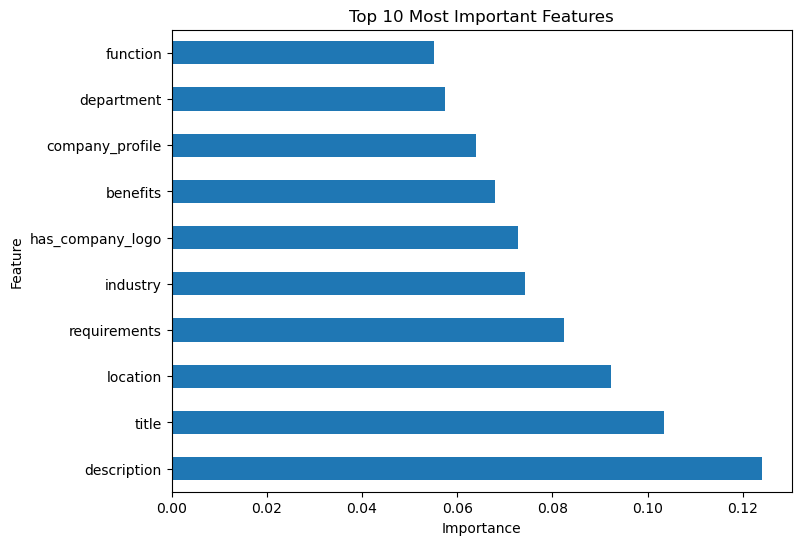

In [16]:
# Feature Importance
try:
    # Train an ExtraTreesClassifier model
    model = ExtraTreesClassifier()
    model.fit(X, training_scores_encoded)
    
    # Print feature importances
    print("Feature importances:")
    print(model.feature_importances_)
    
    # Plot graph of feature importances
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    top_n = 10  # Number of top features to show
    top_feat_importances = feat_importances.nlargest(top_n)
    plt.figure(figsize=(8, 6))
    top_feat_importances.plot(kind='barh')
    plt.title("Top {} Most Important Features".format(top_n))
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.savefig('most_important_features.png')
    plt.show()
    
except Exception as e:
    print("Error during feature importance analysis:")
    print(str(e))


## 4. Application of Various Classifiers on Dataset

Classifier accuracy being obtained with single thread
********************************************************************************
+------------------------------------------------------------------------------+
|                                                                              |
|                              MODEL RESULTS                                   |
|                                                                              |
+------------------------------------------------------------------------------+
********************************************************************************
```````````````````````````````````````````````````````````````````````````````````
Calculating the accuracy of LinR...
Estimated Accuracy of Linear Regression: 8.02%
Linear Regression Executed in: 0.100 seconds
```````````````````````````````````````````````````````````````````````````````````
Calculating the accuracy of LogR...
Estimated Accuracy of Logistic Regression: 95.1

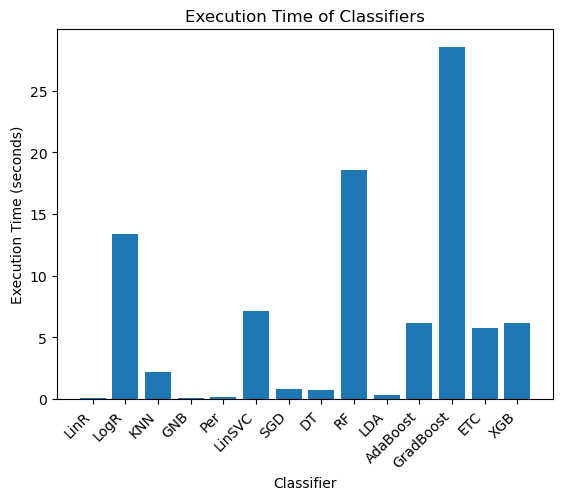


 

Classifier 			 :: Accuracy
Linear Regression                ::  0.080
Logistic Regression              ::  0.952
k-Nearest Neighbors              ::  0.958
Gaussian Naive Bayes             ::  0.914
Perceptron                       ::  0.945
Linear SVC                       ::  0.860
Stochastic Gradient Descent      ::  0.937
Decision Tree                    ::  0.976
Random Forest                    ::  0.985
Linear Discriminant Analysis     ::  0.948
Ada Boost - Ensemble             ::  0.967
Gradient Boosting                ::  0.975
ExtraTrees                       ::  0.982
Extreme Gradient Boosting        ::  0.987


In [21]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def classifiers(info):
    classifier_names = info[0]
    X = info[1]
    training_scores_encoded = info[2]
    df = info[3]
    targetVariable = info[4]
    
    results={}
    #results = pd.DataFrame(columns=["Classifier", "Accuracy"])
    execution_times = {}
    print("*" * 80)
    print("+" + "-" * 78 + "+")
    print("|" + " " * 78 + "|")
    print("|" + " " * 30 + "MODEL RESULTS" + " " * 35 + "|")
    print("|" + " " * 78 + "|")
    print("+" + "-" * 78 + "+")
    print("*" * 80)

    for classifier_name in classifier_names:
        print("```````````````````````````````````````````````````````````````````````````````````")
        print(f"Calculating the accuracy of {classifier_name}...")
        
        if classifier_name == "LinR":
            clf_name = "Linear Regression"
            try:
                scaler = MinMaxScaler(feature_range=(0, 1))
                rescaledX = scaler.fit_transform(X)
                
                # Linear Regression
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                start_time = time.perf_counter()
                lin_reg= LinearRegression()
                results_linreg= cross_val_score(lin_reg, rescaledX, training_scores_encoded, cv=kfold)
                print('Estimated Accuracy of Linear Regression: {:.2%}'.format(results_linreg.mean()))
                end_time = time.perf_counter()
                execution_time = end_time - start_time
                accuracy = results_linreg.mean()
                results[clf_name] = accuracy
                print(clf_name,'Executed in: {:.3f} seconds'.format(execution_time))
                execution_times[classifier_name] = execution_time
                
            except Exception as e:
                print("Error Linear Regression")
                print (str(e))

        if classifier_name == "LogR":
            clf_name = "Logistic Regression"
            try:
                # Logistic Regression
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                start_time = time.perf_counter()
                logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
                results_logreg = cross_val_score(logreg, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimated Accuracy of Logistic Regression: {:.2%}'.format(results_logreg.mean()))
                end_time = time.perf_counter()
                execution_time = end_time - start_time
                print(clf_name,'Executed in: {:.3f} seconds'.format(execution_time))
                execution_times[classifier_name] = execution_time
                accuracy = results_logreg.mean()
                results[clf_name] = accuracy
                
            except Exception as e:
                print("Error Logistic Regression")
                print (str(e))
                
        if classifier_name == "KNN":
            clf_name = "k-Nearest Neighbors"
            try:
                # K-Nearest Neighbors
                kfold = KFold(n_splits=10, shuffle=True, random_state=42)
                start_time = time.perf_counter()
                knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
                results_knn = cross_val_score(knn, X, training_scores_encoded, cv=kfold, n_jobs=-1)
                print('Estimated Accuracy of K-Nearest Neighbors: {:.2%}'.format(results_knn.mean()))
                end_time = time.perf_counter()
                execution_time = end_time - start_time
                print(clf_name,'Executed in: {:.3f} seconds'.format(execution_time))
                execution_times[classifier_name] = execution_time
                accuracy = results_knn.mean()
                results[clf_name] = accuracy

            except Exception as e:
                print("Error K-Nearest Neighbors")
                print(str(e))
                
        if classifier_name == "GNB":
            clf_name = "Gaussian Naive Bayes"
            try:
                # Gaussian Naive Bayes
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                start_time = time.perf_counter()
                gaussian = GaussianNB()
                results_gaussian = cross_val_score(gaussian, X, training_scores_encoded, cv=kfold)
                print('Estimated Accuracy of Gaussian Naive Bayes: {:.2%}'.format(results_gaussian.mean()))
                end_time = time.perf_counter()
                execution_time = end_time - start_time
                print(clf_name,'Executed in: {:.3f} seconds'.format(execution_time))
                execution_times[classifier_name] = execution_time
                accuracy = results_gaussian.mean()
                results[clf_name] = accuracy

            except Exception as e:
                print("Error in Gaussian Naive Bayes")
                print(str(e))
        
        if classifier_name == "Per":
            clf_name = "Perceptron"
            try:
                # Perceptron
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                start_time = time.perf_counter()
                per = Perceptron(max_iter=1000, tol=1e-3)
                results_per = cross_val_score(per, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimated accuracy Perceptron: {:.2%}'.format(results_per.mean()))
                end_time = time.perf_counter()
                execution_time = end_time - start_time
                print(clf_name,'Executed in: {:.3f} seconds'.format(execution_time))
                execution_times[classifier_name] = execution_time
                accuracy = results_per.mean()
                results[clf_name] = accuracy

            except Exception as e:
                print("Error in Perceptron")
                print(str(e))

        if classifier_name == "LinSVC":
            clf_name = "Linear SVC"
            try:
                # Linear SVC
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                start_time = time.perf_counter()
                svc = LinearSVC(max_iter=1000)
                results_svc = cross_val_score(svc, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimated accuracy Linear SVC: {:.2%}'.format(results_svc.mean()))
                end_time = time.perf_counter()
                execution_time = end_time - start_time
                print(clf_name,'Executed in: {:.3f} seconds'.format(execution_time))
                execution_times[classifier_name] = execution_time
                accuracy = results_svc.mean()
                results[clf_name] = accuracy

            except Exception as e:
                print("Error in Linear SVC")
                print(str(e))
                
        if classifier_name == "SGD":
            clf_name="Stochastic Gradient Descent"
            try:
                # Stochastic Gradient Descent
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                start_time = time.perf_counter()
                sgd = SGDClassifier(max_iter=1000, tol=1e-3)
                results_sgd = cross_val_score(sgd, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimated accuracy Stochastic Gradient Descent: {:.2%}'.format(results_sgd.mean()))
                end_time = time.perf_counter()
                execution_time = end_time - start_time
                print(clf_name,'Executed in: {:.3f} seconds'.format(execution_time))
                execution_times[classifier_name] = execution_time
                accuracy = results_sgd.mean()
                results[clf_name] = accuracy

            except Exception as e:
                print("Error in Stochastic Gradient Descent")
                print(str(e))

        if classifier_name == "DT":
            clf_name="Decision Tree"
            try:
                # Decision Tree
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                start_time = time.perf_counter()
                dt = DecisionTreeClassifier()
                results_dt = cross_val_score(dt, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimated accuracy Decision Tree: {:.2%}'.format(results_dt.mean()))
                end_time = time.perf_counter()
                execution_time = end_time - start_time
                print(clf_name,'Executed in: {:.3f} seconds'.format(execution_time))
                execution_times[classifier_name] = execution_time
                accuracy = results_dt.mean()
                results[clf_name] = accuracy

            except Exception as e:
                print("Error in Decision Tree")
                print(str(e))

        if classifier_name == "RF":
            clf_name = "Random Forest"
            try:
                # Random Forest
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                start_time = time.perf_counter()
                rf = RandomForestClassifier(n_estimators=100)
                results_rf = cross_val_score(rf, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimated accuracy Random Forest: {:.2%}'.format(results_rf.mean()))
                end_time = time.perf_counter()
                execution_time = end_time - start_time
                print(clf_name,'Executed in: {:.3f} seconds'.format(execution_time))
                execution_times[classifier_name] = execution_time
                accuracy = results_rf.mean()
                results[clf_name] = accuracy

            except Exception as e:
                print("Error in Random Forest")
                print(str(e))
                
        if classifier_name == "LDA":
            clf_name="Linear Discriminant Analysis"
            try:
                # Linear Discriminant Analysis
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                start_time = time.perf_counter()
                lda = LinearDiscriminantAnalysis()
                results_lda = cross_val_score(lda, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimated accuracy Linear Discriminant Analysis: {:.2%}'.format(results_lda.mean()))
                end_time = time.perf_counter()
                execution_time = end_time - start_time
                print(clf_name,'Executed in: {:.3f} seconds'.format(execution_time))
                execution_times[classifier_name] = execution_time
                accuracy = results_lda.mean()
                results[clf_name] = accuracy

            except Exception as e:
                print("Error in Linear Discriminant Analysis")
                print(str(e))

        if classifier_name == "AdaBoost":
            clf_name = "Ada Boost - Ensemble"
            try:
                # Ada Boost Classifier
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                start_time = time.perf_counter()
                AB = AdaBoostClassifier()
                results_AB = cross_val_score(AB, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy Ada Boost Classifier: {:.2%}'.format(results_AB.mean()))
                end_time = time.perf_counter()
                execution_time = end_time - start_time
                print(clf_name,'Executed in: {:.3f} seconds'.format(execution_time))
                execution_times[classifier_name] = execution_time
                accuracy = results_AB.mean()
                results[clf_name] = accuracy

            except Exception as e:
                print("error  Ada Boost Classifier")
                print (str(e))
        
        if classifier_name == "GradBoost":
            clf_name = "Gradient Boosting"
            try:
                #AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)

                # Gradient Boosting Classifier
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                start_time = time.perf_counter()
                GBC = GradientBoostingClassifier()
                results_GBC = cross_val_score(GBC, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy Gradient Boosting Classifier: {:.2%}'.format(results_GBC.mean()))
                end_time = time.perf_counter()
                execution_time = end_time - start_time
                print(clf_name,'Executed in: {:.3f} seconds'.format(execution_time))
                execution_times[classifier_name] = execution_time
                accuracy = results_GBC.mean()
                results[clf_name] = accuracy

            except Exception as e:
                print("error Gradient Boosting Classifier")
                print (str(e))

        if classifier_name == "ETC":
            clf_name = "ExtraTrees"
            try:
                #ExtraTreesClassifier
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                start_time = time.perf_counter()
                ETC=ExtraTreesClassifier(n_estimators=100)
                results_ETC = cross_val_score(ETC, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy ExtraTreesClassifier: {:.2%}'.format(results_ETC.mean()))
                end_time = time.perf_counter()
                execution_time = end_time - start_time
                print(clf_name,'Executed in: {:.3f} seconds'.format(execution_time))
                execution_times[classifier_name] = execution_time
                accuracy = results_ETC.mean()
                results[clf_name] = accuracy

            except Exception as e:
                print("error ExtraTreesClassifier")
                print (str(e))
        
        if classifier_name == "XGB":
            clf_name = "Extreme Gradient Boosting"
            
            #XGBClassifier(objective
            xgbs = XGBClassifier(objective="binary:logistic", random_state=42)
            start_time = time.perf_counter()
            results_xgbs = cross_val_score(xgbs, X, training_scores_encoded, cv=kfold, scoring='accuracy')
            print('Estimate accuracy XGBClassifier: {:.2%}'.format(results_xgbs.mean()))
            end_time = time.perf_counter()
            execution_time = end_time - start_time
            print(clf_name,'Executed in: {:.3f} seconds'.format(execution_time))
            execution_times[classifier_name] = execution_time
            accuracy = results_xgbs.mean()
            results[clf_name] = accuracy
    
        #results = results.append({"Classifier": clf_name, "Accuracy": accuracy}, ignore_index=True)
        #results = results.sort_values(by=['Accuracy'], ascending=False)
        
    # Plot bar graph of execution times
    plt.bar(execution_times.keys(), execution_times.values())
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Classifier")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Execution Time of Classifiers")
    plt.savefig("model_execution_time.png", bbox_inches="tight")
    plt.show()
    
    return results
                
        

CLASSIFIERS = [ "LinR", "LogR", "KNN", "GNB", "Per", "LinSVC", "SGD", "DT", "RF", "LDA", "AdaBoost", "GradBoost", "ETC", "XGB" ]

if (sys.platform == "win32"): # Windows
    print("Classifier accuracy being obtained with single thread")
    
    results = classifiers([CLASSIFIERS, X, training_scores_encoded, df, targetVariable])
    print("\n \n")
    print(f"Classifier \t\t\t :: Accuracy")
    print("=====================================================================================")
    for clf_name, accuracy in results.items():
        print(f"{clf_name:32} :: {accuracy:6.3f}")
    print("=====================================================================================")
    
else:
    print("Classifier accuracy being obtained with multiple threads")
    fourDataSets = [[CLASSIFIERS[0:3] ,X, training_scores_encoded, df, targetVariable],
                        [CLASSIFIERS[4:7] ,X, training_scores_encoded, df, targetVariable],
                        [CLASSIFIERS[8:11] ,X, training_scores_encoded, df, targetVariable],
                        [CLASSIFIERS[12:13] ,X, training_scores_encoded, df, targetVariable]] 

    pool = Pool(processes=4)
    pool.map(classifiers, fourDataSets)
    results = pd.concat(pool.map(classifiers, fourDataSets))
    print(results)
                       
                       

### Calculate AUC Score and also Plotting ROC curves for top 2 Classifiers with highest Accuracy

 AUC Score of Extra Trees Classifier is 0.99)


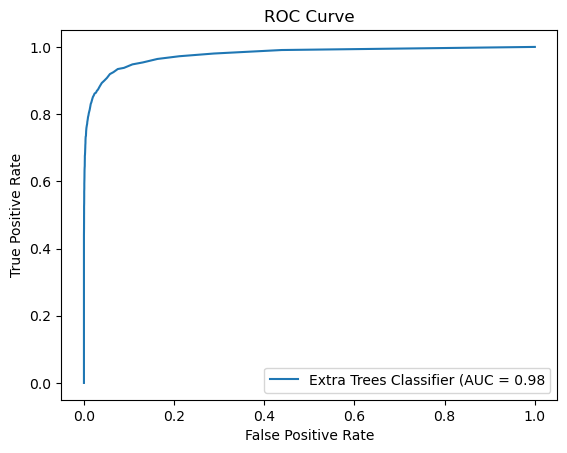

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

try:
    # ExtraTreesClassifier
    clf_name = 'Extra Trees Classifier'
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    ETC = ExtraTreesClassifier(n_estimators=100)
    y_pred_proba = cross_val_predict(ETC, X, training_scores_encoded, cv=kfold, method='predict_proba')
    fpr, tpr, thresholds = roc_curve(training_scores_encoded, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    print(f" AUC Score of {clf_name} is {auc_score:.2f})")
    
    #Visualize ROC_AUC curve
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    results_ETC = cross_val_score(ETC, X, training_scores_encoded, cv=kfold, scoring='accuracy')

    # Accuracy
    accuracy = results_ETC.mean()
    results[clf_name] = accuracy

except Exception as e:
    print(f'Error {clf_name}')
    print(str(e))


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, training_scores_encoded, test_size=0.2, random_state=42)

clf_name = "Extreme Gradient Boosting"

#XGBClassifier(objective
xgbs = XGBClassifier(objective="binary:logistic", random_state=42)
xgbs.fit(X_train, y_train)
y_pred = xgbs.predict(X_test)
y_prob = xgbs.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
print(f" AUC Score of {clf_name} is {auc_score:.2f})")

# Plot ROC curve and AUC score
plt.plot(fpr, tpr, label=f"{clf_name} (AUC = {auc_score:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Classifiers")
plt.legend()
plt.savefig(f"{clf_name} ROC Curve.png")
plt.show()
